In [1]:
# This is a python block

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# Cargar data

- cargo

In [4]:
df_data = pd.read_csv('./dataset_clean.csv', index_col=[0])

# Preprocesamiento rápido

- Resuelvo problemas con descriptores que tienen infinitos

In [5]:
filter = df_data['Vacancy energy (log[eV/O atom])'] == -np.inf
df_data['Vacancy energy (log[eV/O atom])'][filter] = np.nan

/tmp/ipykernel_1511/1743523762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Vacancy energy (log[eV/O atom])'][filter] = np.nan


In [6]:
filter = df_data['Stability (log[eV/atom])'] == -np.inf
df_data['Stability (log[eV/atom])'][filter] = np.nan

/tmp/ipykernel_1511/1119673096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Stability (log[eV/atom])'][filter] = np.nan


- Elimino nulos sí o sí (la otra alternativa sería imputar)

In [7]:
df_data.isnull().sum()

Lowest distortion                     0
A                                     0
B                                     0
Radius A [ang]                        0
Radius B [ang]                        0
Formation energy [eV/atom]            0
Stability [eV/atom]                   0
Volume per atom [A^3/atom]            0
Band gap [eV]                         0
a [ang]                               0
Vacancy energy [eV/O atom]          349
Stability (log[eV/atom])            290
Vacancy energy (log[eV/O atom])    3169
Magnetic moment (^2[mu_B])          947
Valence B_1                           0
Valence B_2                           0
Valence B_3                           0
Valence B_4                           0
Valence B_5                           0
Valence B_element not in BV           0
Valence B_not balanced                0
dtype: int64

In [8]:
df_data.drop('Vacancy energy (log[eV/O atom])', axis=1, inplace= True)

In [9]:
df_data.dropna(inplace=True)

# Split target y patrón

- Split

In [10]:
x = df_data.drop(['Lowest distortion', 'a [ang]'], axis=1)
y = df_data['a [ang]']

- Validación

In [11]:
print(x.shape)
print(y.shape)

(3720, 18)
(3720,)


# Split train y test

- Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, shuffle = True)

- Validación

In [13]:
print(X_train.shape)
print(X_test.shape)

(2976, 18)
(744, 18)


In [14]:
X_train.columns

Index(['A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Magnetic moment (^2[mu_B])', 'Valence B_1', 'Valence B_2',
       'Valence B_3', 'Valence B_4', 'Valence B_5',
       'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

# Escalamiento/Normalización de los datos 

- Instancio scaler para target y patron

In [15]:
x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler

- Escalo con fit sobre train, y trasnformo test

In [16]:
X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test

In [17]:
y_train = y_st_scaler.fit_transform(y_train.values.reshape(-1,1)) # escalo train
y_test = y_st_scaler.transform(y_test.values.reshape(-1,1)) #transformo test

# Entrenamiento del modelo con Linear Regression

- Importo modelo de Sklearn

In [18]:
from sklearn.linear_model import LinearRegression

- Instancio modelo

In [19]:
model = LinearRegression()

- Entreno

In [20]:
model.fit(X_train, y_train)

LinearRegression()

- Predigo

In [21]:
y_pred = model.predict(X_test)

- Evaluación rápida

In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

r2 = metrics.r2_score(y_test, y_pred)

In [23]:
print("mae: \t", mae.round(4))
print("mse: \t", mse.round(4))
print("rmse: \t", rmse.round(4))
print("r2: \t", r2.round(4))

mae: 	 0.4034
mse: 	 0.2883
rmse: 	 0.537
r2: 	 0.7231


# Mejora del modelo y residuales

- Instalo rgressors para hacer un análisis más profundo de la regresión lineal

In [24]:
!pip install --upgrade pip setuptools==57.5.0
!pip install regressors

- Imports el stats de regressors

In [25]:
from regressors import stats

## Evaluación modelo 1

- saco intercepto y coeficientes

In [26]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

- Stats summary

In [27]:
y_test = y_test.reshape(-1)

print("==========Summary==========")

# le paso modelo, datos de test y column names de los features
stats.summary(model, X_test, y_test, list(list(x)))

#el iintercepto esta muy elevdo, al igual que A,B, band gap, magnetic moment, y todas las valencias

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.7979 -0.3161  0.0392 0.2949 1.9342


Coefficients:
                             Estimate     Std. Error  t value   p value
_intercept                  -0.000000       0.019898  -0.0000  1.000000
A                           -0.032370       0.020254  -1.5982  0.110422
B                           -0.016238       0.020040  -0.8103  0.418046
Radius A [ang]              -0.123499       0.026198  -4.7140  0.000003
Radius B [ang]               0.164242       0.036253   4.5304  0.000007
Formation energy [eV/atom]  -0.116035       0.030046  -3.8619  0.000122
Stability [eV/atom]         -0.245772       0.035280  -6.9663  0.000000
Volume per atom [A^3/atom]   0.249752       0.032978   7.5733  0.000000
Band gap [eV]               -0.000259       0.024088  -0.0108  0.991419
Vacancy energy [eV/O atom]  -0.200279       0.026494  -7.5595  0.000000
Stability (log[eV/atom])    -0.513511       0.035257 -14.5647  0.000000
Magne

- Residuales (resta entre reales y predichos)

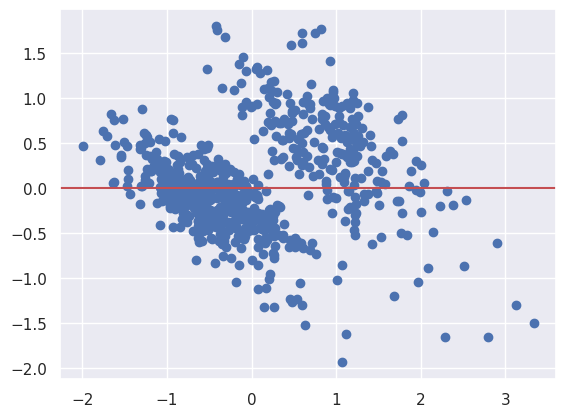

In [28]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## Evaluación modelo 2

- Copio el df original

In [29]:
df_second = df_data.copy()

- Hago nuevo modelo usando solo las comumnas de interes

In [30]:
df_second.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]', 'a [ang]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Magnetic moment (^2[mu_B])', 'Valence B_1', 'Valence B_2',
       'Valence B_3', 'Valence B_4', 'Valence B_5',
       'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

In [31]:
X_cols = ['Radius A [ang]', 'Radius B [ang]', 'Formation energy [eV/atom]', 'Stability [eV/atom]',
        'Volume per atom [A^3/atom]', 'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',]
y_col = ['a [ang]']

x = df_second[X_cols]
y = df_second[y_col]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, shuffle = True)

x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler

X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test
y_train = y_st_scaler.fit_transform(y_train.values.reshape(-1,1)) # escalo train
y_test = y_st_scaler.transform(y_test.values.reshape(-1,1)) #transformo test

model = LinearRegression(fit_intercept=False) #entreno SIN el intercepto
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

- Evaluacióon rápida

In [32]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7254
mse:  0.286


- Stats

In [33]:
#model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [34]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8346 -0.3176  0.0483 0.3012 1.8884


Coefficients:
                            Estimate  Std. Error  t value   p value
_intercept                  0.000000    0.019715   0.0000  1.000000
Radius A [ang]             -0.120430    0.024789  -4.8582  0.000001
Radius B [ang]              0.162730    0.033688   4.8305  0.000002
Formation energy [eV/atom] -0.105216    0.026246  -4.0088  0.000067
Stability [eV/atom]        -0.263142    0.034307  -7.6702  0.000000
Volume per atom [A^3/atom]  0.260160    0.030788   8.4500  0.000000
Vacancy energy [eV/O atom] -0.198565    0.025043  -7.9291  0.000000
Stability (log[eV/atom])   -0.506391    0.033167 -15.2678  0.000000
---
R-squared:  0.72538,    Adjusted R-squared:  0.72276
F-statistic: 277.72 on 7 features


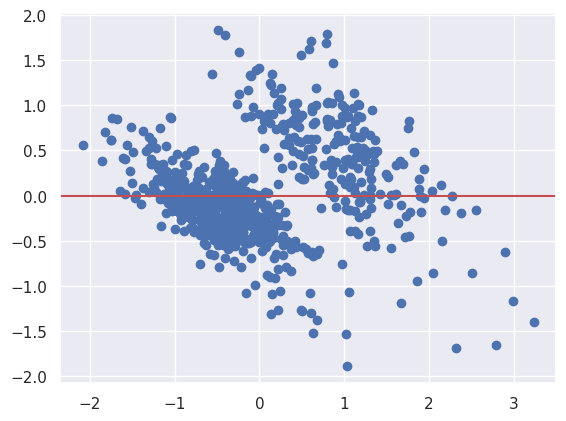

In [35]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>